## Predict the Global Sales in Video Games using Linear Regression

Import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import random
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Read the data from the csv file

In [2]:
data = pd.read_csv("../vgsales.csv")

Get the info of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Check if there are nan values

In [4]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Year feature has 271 nan values and Publisher feature has 58 nan values

In [5]:
year = data.Year.unique() #Get array of unique values of year
year_list=[] 
for i in year:
    if not np.isnan(i):
        year_list.append(i) #If the value in the array is not nan append it to year_list

To replace nan values with random year

In [6]:
year_length=len(data['Year'])        #Get the no. of instances 
for i in range(year_length):
    if str(data['Year'][i]) == ('nan' or ' nan'):
        a = random.choice(year_list) #get a random value from the year list 
        data['Year'][i] = a          #Replace it with random values

C:\Users\Nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [7]:
publisher = data.Publisher.unique() #Get array of unique values of publisher
publisher_list=[] 
for i in publisher:   
    if not pd.isnull(i):
        publisher_list.append(i) #Append non nan values to publisher_list

To eliminate nan values with random publisher value

In [8]:
publisher_length=len(data['Publisher'])  #Get the no. of instances 
for i in range(publisher_length):
    if str(data['Publisher'][i]) == ('nan' or ' nan'):
        a = random.choice(publisher_list) #get a random value from the publisher list 
        data['Publisher'][i] = a          #Replace it with random values

C:\Users\Nisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [9]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

There is no nan values present in the year as well as publisher

In [10]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### To find the relationship between Genre and Global Sales

In [11]:
genreList = list(data.Genre.unique())  # create a list using unique values of Genre
publisherList = list(data.Publisher.unique())
eusales = []       # empty lists
nasales = []
jpsales = []
othersales = []
globalsales = []
for i in genreList:
    x = data[data['Genre']==i]      # find means of sales for each genre
    eusales.append(sum(x.EU_Sales)/len(x))
    jpsales.append(sum(x.JP_Sales)/len(x))
    nasales.append(sum(x.NA_Sales)/len(x))
    othersales.append(sum(x.Other_Sales)/len(x))
    globalsales.append(sum(x.Global_Sales)/len(x))
dataframe1 = pd.DataFrame({'genreList': genreList,'eusales':eusales,'nasales':nasales,'jpsales':jpsales,'othersales':othersales,'globalsales':globalsales}) # create dictionary, turn it to dataframe
new_index = (dataframe1['globalsales'].sort_values(ascending=False)).index.values# sort values ,ascending=False : sort by decreasing
final1 = dataframe1.reindex(new_index) # put sorted index in new_index,new dataframe
print(final1)

       genreList   eusales   nasales   jpsales  othersales  globalsales
1       Platform  0.227573  0.504571  0.147596    0.058228     0.938341
6        Shooter  0.239137  0.444733  0.029221    0.078389     0.791885
3   Role-Playing  0.126384  0.219946  0.236767    0.040060     0.623233
2         Racing  0.190865  0.287766  0.045388    0.061865     0.586101
0         Sports  0.160635  0.291283  0.057702    0.057532     0.567319
9       Fighting  0.119481  0.263667  0.103007    0.043255     0.529375
8         Action  0.158323  0.264726  0.048236    0.056508     0.528100
5           Misc  0.124198  0.235906  0.061967    0.043312     0.465762
7     Simulation  0.130773  0.211430  0.073472    0.036355     0.452364
4         Puzzle  0.087251  0.212680  0.098471    0.021564     0.420876
11      Strategy  0.066579  0.100881  0.072628    0.016681     0.257151
10     Adventure  0.049868  0.082271  0.040490    0.013072     0.185879


### Visualizing the relation between Genre and Global Sales 

Text(0, 0.5, 'Global Sales')

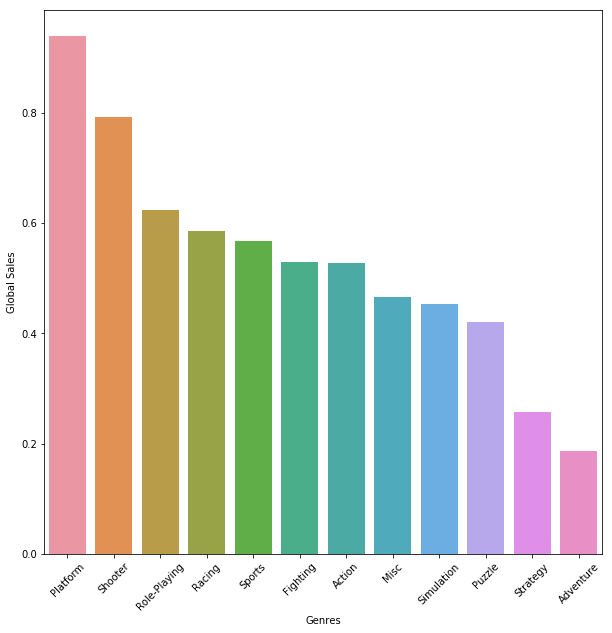

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(x=final1['genreList'], y=final1['globalsales'])
plt.xticks(rotation= 45)
plt.xlabel('Genres')
plt.ylabel('Global Sales')

We get to know that Platform Genre has got the highest Global sales

### Pointplot of the same

Text(0.5, 1.0, 'Sales')

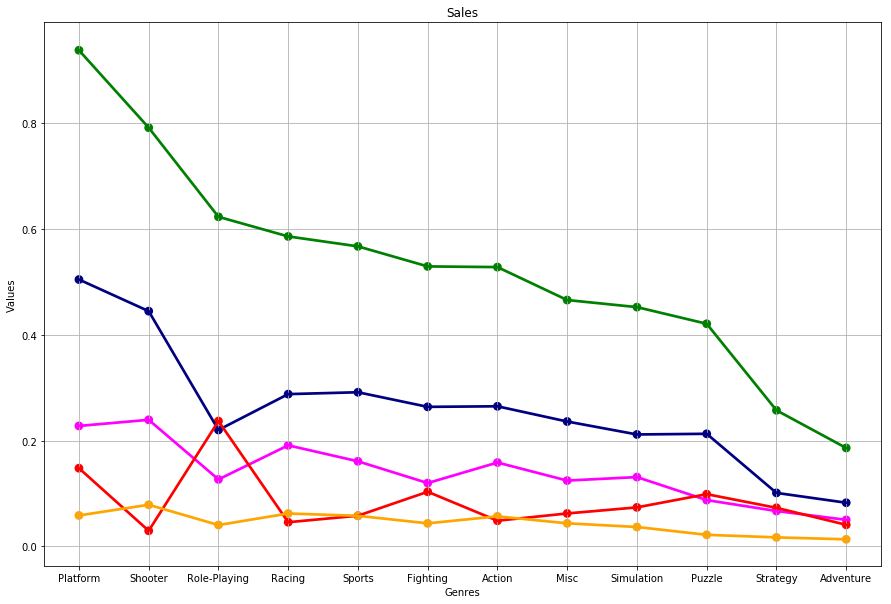

In [13]:
plt.figure(figsize=(15,10)) #create a (15,10) frame for plot 
sns.pointplot(x="genreList",y="eusales",color='magenta',alpha=0.6,data=final1) #alpha=opacity, data= dataframe that i use (final1)
sns.pointplot(x="genreList",y="nasales",color='navy',alpha=0.6,data=final1)
sns.pointplot(x='genreList',y='jpsales',color='red',alpa=0.6,data=final1)
sns.pointplot(x='genreList',y='othersales',color='orange',data=final1)
sns.pointplot(x='genreList',y='globalsales',color='green',data=final1)
plt.grid()
plt.xlabel("Genres")
plt.ylabel("Values")
plt.title("Sales")

### To find the relationship between Publisher and Global Sales

In [14]:
publisherList = list(data.Publisher.unique()) #Get list of unique values of publisher
eusales = []       # empty lists
nasales = []
jpsales = []
othersales = []
globalsales = []
for i in publisherList:
    x = data[data['Publisher']==i]      # find means of sales for each publisher
    eusales.append(sum(x.EU_Sales)/len(x))
    jpsales.append(sum(x.JP_Sales)/len(x))
    nasales.append(sum(x.NA_Sales)/len(x))
    othersales.append(sum(x.Other_Sales)/len(x))
    globalsales.append(sum(x.Global_Sales)/len(x))
dataframe2 = pd.DataFrame({'publisherList': publisherList,'eusales':eusales,'nasales':nasales,'jpsales':jpsales,'othersales':othersales,'globalsales':globalsales}) # create dictionary, turn it to dataframe
new_index = (dataframe2['globalsales'].sort_values(ascending=False)).index.values# sort values ,ascending=False : sort by decreasing
final2 = dataframe2.reindex(new_index) # put sorted index in new_index,new dataframe
print(final2)

                          publisherList   eusales   nasales   jpsales  \
26                               Palcom  0.440000  3.380000  0.310000   
36                              Red Orb  1.805000  0.770000  0.000000   
0                              Nintendo  0.594957  1.160767  0.646903   
38                  Arena Entertainment  0.440000  1.850000  0.000000   
44                          UEP Systems  0.460000  1.520000  0.200000   
22                            RedOctane  0.327500  1.610000  0.007500   
55                                Valve  0.630000  0.830000  0.020000   
62                          Hello Games  0.740000  0.580000  0.020000   
15   Sony Computer Entertainment Europe  0.600000  0.597333  0.166667   
65                     Westwood Studios  0.000000  1.550000  0.000000   
1                Microsoft Game Studios  0.363016  0.821958  0.017249   
47                               Imagic  0.067500  1.127500  0.000000   
83                    Black Label Games  0.460000  

### Visualizing the relation between Publisher and Global Sales 

Text(0, 0.5, 'Global Sales')

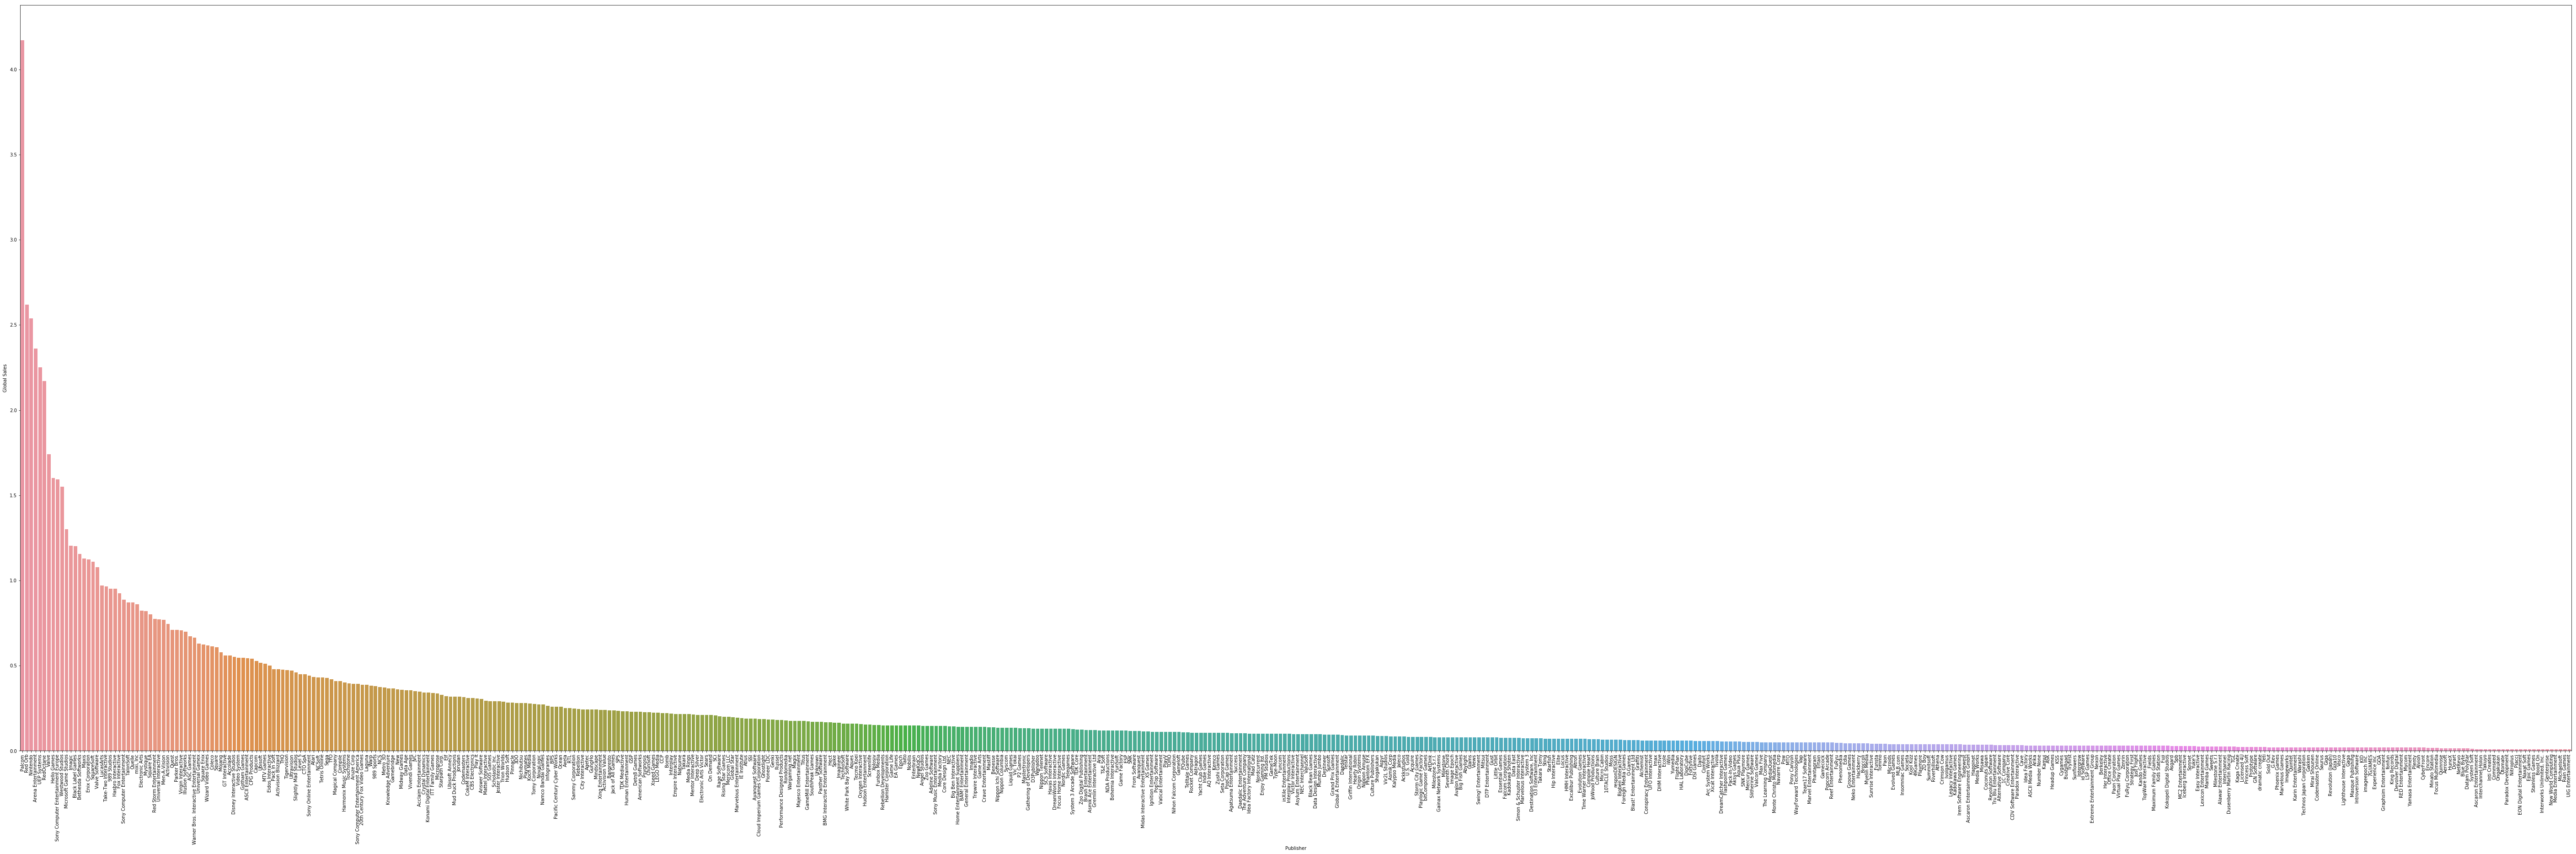

In [15]:
plt.figure(figsize=(100,30))
sns.barplot(x=final2['publisherList'], y=final2['globalsales'])
plt.xticks(rotation= 90)
plt.xlabel('Publisher')
plt.ylabel('Global Sales')

### To find the relationship between Platform and Global Sales

In [16]:
platformList = list(data.Platform.unique()) #Get the list of unique values of platform
eusales = []       # empty lists
nasales = []
jpsales = []
othersales = []
globalsales = []
for i in platformList:
    x = data[data['Platform']==i]      # find means of sales for each platform
    eusales.append(sum(x.EU_Sales)/len(x))
    jpsales.append(sum(x.JP_Sales)/len(x))
    nasales.append(sum(x.NA_Sales)/len(x))
    othersales.append(sum(x.Other_Sales)/len(x))
    globalsales.append(sum(x.Global_Sales)/len(x))
dataframe3 = pd.DataFrame({'platformList': platformList,'eusales':eusales,'nasales':nasales,'jpsales':jpsales,'othersales':othersales,'globalsales':globalsales}) # create dictionary, turn it to dataframe
new_index = (dataframe3['globalsales'].sort_values(ascending=False)).index.values# sort values ,ascending=False : sort by decreasing
final3 = dataframe3.reindex(new_index) # put sorted index in new_index,new dataframe
print(final3)

   platformList   eusales   nasales   jpsales  othersales  globalsales
2            GB  0.487959  1.166531  0.868571    0.083673     2.606633
1           NES  0.215816  1.285102  1.006633    0.054184     2.561939
20          GEN  0.204444  0.713704  0.098889    0.032963     1.050370
7          SNES  0.079665  0.256192  0.487657    0.013473     0.837029
10          PS4  0.368155  0.288095  0.042560    0.129048     0.827679
4          X360  0.221802  0.475138  0.009826    0.067621     0.774672
15         2600  0.041128  0.681203  0.000000    0.006842     0.729925
5           PS3  0.258623  0.295154  0.060188    0.106795     0.720722
0           Wii  0.202551  0.383177  0.052340    0.060838     0.699404
11          N64  0.128715  0.435799  0.107273    0.013730     0.686144
17         XOne  0.214319  0.390563  0.001596    0.055962     0.662254
12           PS  0.178595  0.281363  0.116906    0.034206     0.610920
6           PS2  0.157006  0.270171  0.064415    0.089514     0.581046
19    

### Visualizing the relation between Platform and Global Sales 

Text(0.5, 1.0, 'Sales')

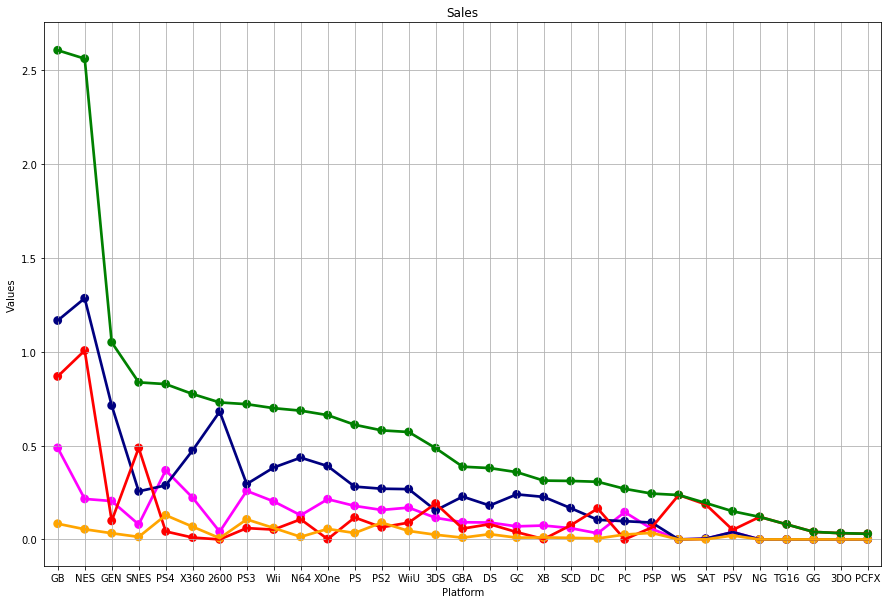

In [17]:
plt.figure(figsize=(15,10)) #create a (15,10) frame for plot 
sns.pointplot(x="platformList",y="eusales",color='magenta',alpha=0.6,data=final3) #alpha=opacity, data= dataframe that i use (final1)
sns.pointplot(x="platformList",y="nasales",color='navy',alpha=0.6,data=final3)
sns.pointplot(x='platformList',y='jpsales',color='red',alpa=0.6,data=final3)
sns.pointplot(x='platformList',y='othersales',color='orange',data=final3)
sns.pointplot(x='platformList',y='globalsales',color='green',data=final3)
plt.grid()
plt.xlabel("Platform")
plt.ylabel("Values")
plt.title("Sales")

### To find the relationship between Year and Global Sales

In [18]:
data.Year = data.Year.astype(int) #Convert year to int from float
year = list(data.Year.unique()) #Get the list of unique values of year
eusales = []       # empty lists
nasales = []
jpsales = []
othersales = []
globalsales = []
for i in year:
    x = data[data['Year']==i]      # find means of sales for each year
    eusales.append(sum(x.EU_Sales)/len(x))
    jpsales.append(sum(x.JP_Sales)/len(x))
    nasales.append(sum(x.NA_Sales)/len(x))
    othersales.append(sum(x.Other_Sales)/len(x))
    globalsales.append(sum(x.Global_Sales)/len(x))
dataframe4 = pd.DataFrame({'year': year,'eusales':eusales,'nasales':nasales,'jpsales':jpsales,'othersales':othersales,'globalsales':globalsales}) # create dictionary, turn it to dataframe
new_index = (dataframe4['globalsales'].sort_values(ascending=False)).index.values# sort values ,ascending=False : sort by decreasing
final4 = dataframe4.reindex(new_index) # put sorted index in new_index,new dataframe
print(final4)

    year   eusales   nasales   jpsales  othersales  globalsales
6   1984  0.152667  2.230667  0.951333    0.049333     3.384000
1   1985  0.394444  1.917222  0.812222    0.080556     3.203333
5   1989  0.340769  1.788846  0.711923    0.064231     2.905385
14  1988  0.337273  1.140000  0.728182    0.056364     2.261364
13  1990  0.343333  1.164167  0.620833    0.070833     2.199583
22  1992  0.222778  0.664074  0.550000    0.040185     1.477222
28  1986  0.121429  0.464643  0.710000    0.069643     1.366429
34  1987  0.077500  0.410833  0.485417    0.012500     0.988333
35  1980  0.090000  0.790000  0.017143    0.021429     0.919286
36  1983  0.079091  0.395000  0.368182    0.018636     0.860455
30  1991  0.088367  0.371633  0.307143    0.031633     0.798367
24  1993  0.090563  0.269577  0.366901    0.018732     0.745634
8   1999  0.185789  0.371930  0.153041    0.030263     0.741491
4   1996  0.175609  0.324723  0.211956    0.028708     0.741070
33  1981  0.046481  0.655926  0.000741  

### Visualizing the relation between Year and Global Sales 

Text(0, 0.5, 'Global Sales')

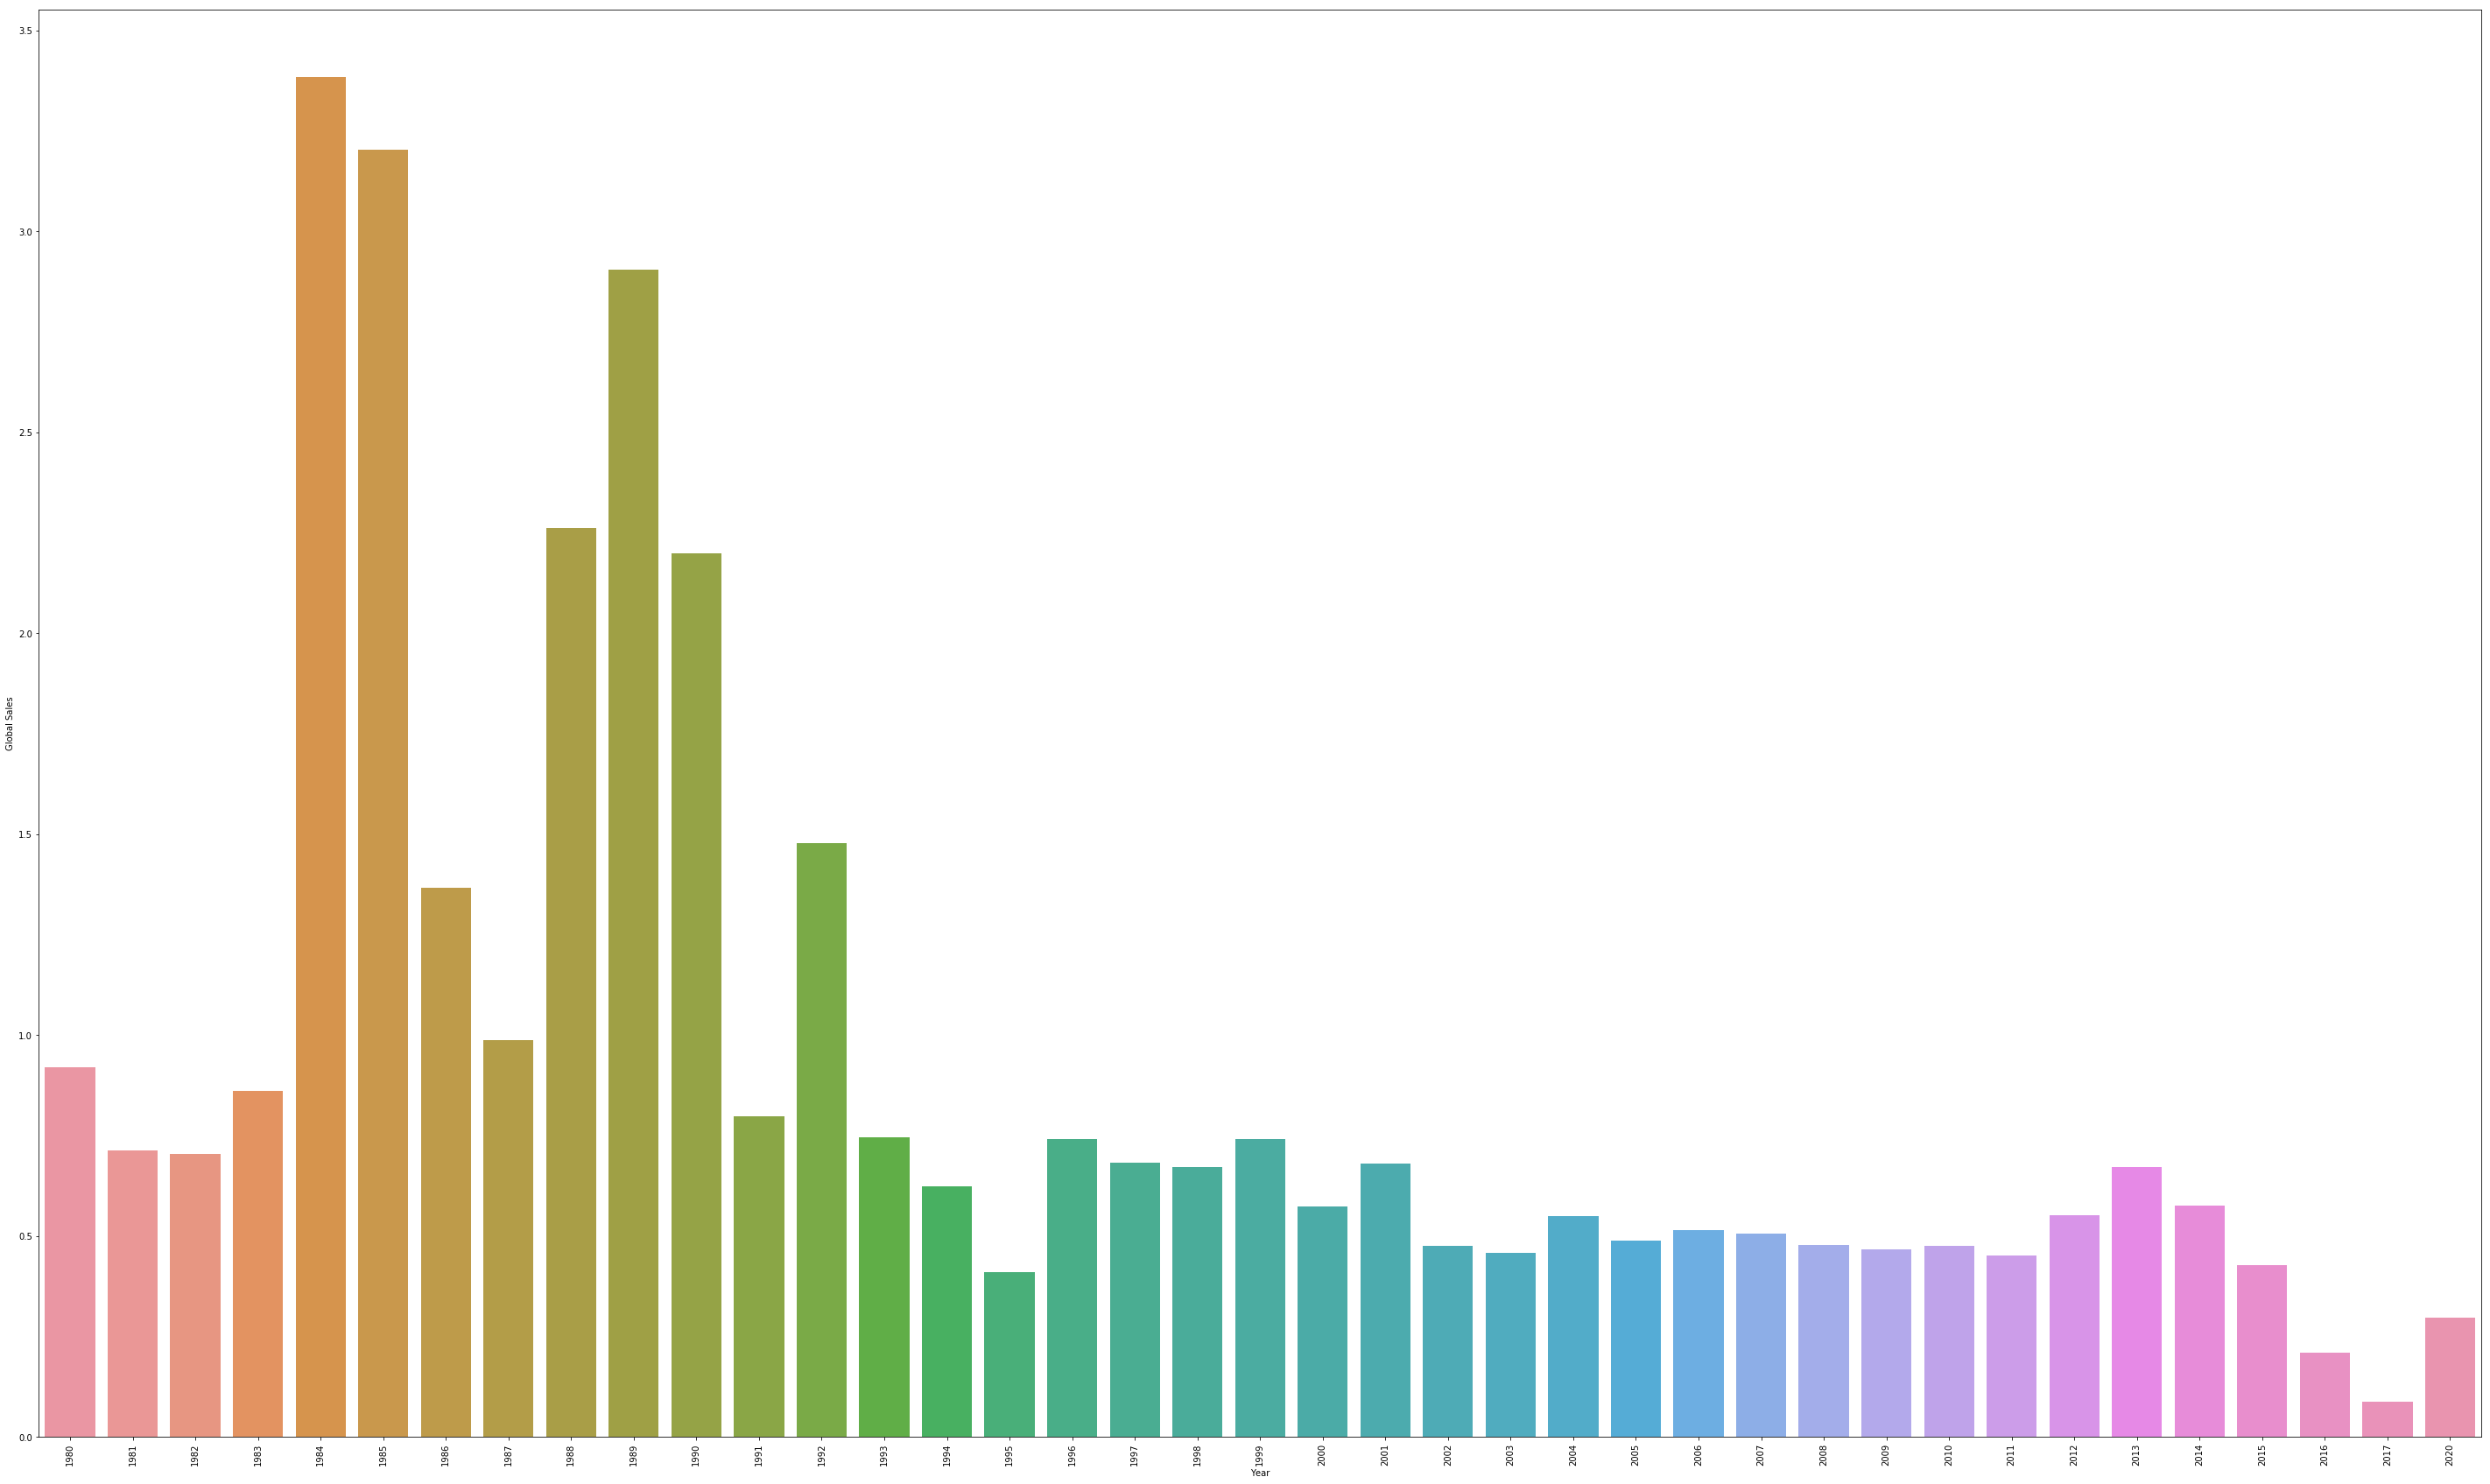

In [19]:
plt.figure(figsize=(50,30))
sns.barplot(x=final4['year'], y=final4['globalsales'])
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Global Sales')

##### By visuallizing, the features year,genre,platform and publisher largely influences the Global Sales ,hence these features are considered

## Data Pre-processing 
Converting the string columns into integer values using get_dummies

In [20]:
x=pd.get_dummies(data['Genre']) #convert string values to int for genre -> generates 12 col
x.head()

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [21]:
y=pd.get_dummies(data['Publisher']) #convert string values to int for publisher -> generates 578 col
y.head()

,10TACLE Studios,1C Company,20th Century Fox Video Games,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,...,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
z=pd.get_dummies(data['Platform']) #convert string values to int for platform -> generates 31 col
z.head()

,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Convert the additional columns into a single column using PCA.

PCA helps in converting a large dataset into a smaller one, that still contains the same amount of information of the large dataset.This technique helps us reduce the larger dimensions of the data into a small one. 

In [23]:
from sklearn.decomposition import PCA
pca = PCA()  

features1 = pca.fit_transform(x) #Fit the model with x(Genre) and apply the dimensionality reduction on x.
features2 = pca.fit_transform(y) #Fit the model with y(publisher) and apply the dimensionality reduction on y.
features3 = pca.fit_transform(z) #Fit the model with z(platform) and apply the dimensionality reduction on z.

pca = PCA(n_components=1)  #reduce to 1 column

features1 = pca.fit_transform(features1)
features1=pd.DataFrame(features1,columns=['genre']) #Create a genre column

features2 = pca.fit_transform(features2)
features2=pd.DataFrame(features2,columns=['publisher']) #Create a publisher column

features3 = pca.fit_transform(features3)
features3=pd.DataFrame(features3,columns=['platform']) #Create a platform column

In [24]:
df=data.drop(['Genre','Publisher','Platform'],axis=1)  #Drop the existing Genre ,publisher,platform columns 
dataset=pd.concat([df,features1,features2,features3],axis=1) #Concate the 3 new columns with the data
dataset.head()

,Rank,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,genre,publisher,platform
0,1,Wii Sports,2006,41.49,29.02,3.77,8.46,82.74,-0.425423,-0.095478,-0.000846
1,2,Super Mario Bros.,1985,29.08,3.58,6.81,0.77,40.24,-0.129749,-0.095478,-0.000339
2,3,Mario Kart Wii,2008,15.85,12.88,3.79,3.31,35.82,-0.156853,-0.095478,-0.000846
3,4,Wii Sports Resort,2009,15.75,11.01,3.28,2.96,33.00,-0.425423,-0.095478,-0.000846
4,5,Pokemon Red/Pokemon Blue,1996,11.27,8.89,10.22,1.00,31.37,-0.181867,-0.095478,-0.000339


### Considering the required features 

In [25]:
x = dataset[['genre','publisher','platform','Year']]
y = dataset['Global_Sales']

### Normalizing the array

In [26]:
x=((x-x.min())/(x.max()-x.min()))
y=((y-y.min())/(y.max()-y.min()))

### Taking the required features as numpy array

In [27]:
x1= np.array(x['genre'])
x2=np.array(x['publisher'])
x3=np.array(x['platform'])
x4=np.array(x['Year'])

y1= np.array(y)

### Split the data into train and test values

In [28]:
x1train,x1test,x2train,x2test,x3train,x3test,x4train,x4test,ytrain,ytest= train_test_split(x1,x2,x3,x4,y1,test_size=0.3)

### Defining the equation for our model

In [29]:
def hypothesis(a,x1,b,x2,c,x3,d,x4,e):
    return a * x1 +b * x2 + c * x3 + d * x4 + e #returns hypothesis eq for our model

### Defining the loss function or error equation for our model

In [30]:
def error(a,x1,b,x2,c,x3,d,x4,e,y):
    err=0     #holds the error value
    m=len(x1) #how many data_pts are present is stored
    
    for i in range(m):
        err += np.power((hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e)-y[i]),2)
        #err=summation(h-y)2
        
    return (1/(2*m)) *err #loss fn

### Defining step-gradient in order to reach the minima

In [31]:
def step_gradient(a,x1,b,x2,c,x3,d,x4,e,y,learning_rate):
    grad_a=0
    grad_b=0
    grad_c=0
    grad_d=0
    grad_e=0
    
    m= len(x1)
    
    for i in range(m):
        grad_a += (1/m) * (hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e)-y[i])*x1[i] #differentaition wrt a
        grad_b += (1/m) * (hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e)-y[i])*x2[i] #diff wrt b
        grad_c += (1/m) * (hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e)-y[i])*x3[i] #diff wrt c
        grad_d += (1/m) * (hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e)-y[i])*x4[i] #diff wrt d
        grad_e += (1/m) * (hypothesis(a,x1[i],b,x2[i],c,x3[i],d,x4[i],e)-y[i])       #diff wrt e
    
    
    a=a-grad_a*learning_rate
    b=b-grad_b*learning_rate
    c=c-grad_c*learning_rate
    d=d-grad_d*learning_rate
    e=e-grad_e*learning_rate

    return a,b,c,d,e

In [32]:
def descend(init_a,x1,init_b,x2,init_c,x3,init_d,x4,init_e,y,learning_rate,iteration):
    a=init_a
    b=init_b
    c=init_c
    d=init_d
    e=init_e
    
    for i in range(iterations): #iterations--> hw many times we step
        err=error(a,x1,b,x2,c,x3,d,x4,e,y)
        
        if i% 1000 == 0:
            print(f"Error: {np.sqrt(err)}, a: {a}, b:{b}, c:{c},d:{d},e:{e}")
            #print error at every 1000 step
            #sqrt of mean error
            
        a,b,c,d,e =step_gradient(a,x1,b,x2,c,x3,d,x4,e,y,learning_rate)
        
    return a,b,c,d,e

In [33]:
a=0
b=0
c=0
d=0
e=0
learning_rate = 0.01
iterations = 10000

In [34]:
final_a, final_b,final_c,final_d,final_e = descend(a,x1train,b,x2train,c,x3train,d,x4train,e,ytrain,learning_rate,iterations)

Error: 0.013774397638902834, a: 0, b:0, c:0,d:0,e:0
Error: 0.013052415811936361, a: 0.00031889386328975375, b:0.001975750539265329, c:0.0006295882865820252,d:0.0011500524472546941,e:0.004617384972082868
Error: 0.013041664252427842, a: 5.931598468866135e-05, b:0.002632193796048584, c:1.4646427026073895e-05,d:0.00017100985942783913,e:0.00557808951221241
Error: 0.013035758121830585, a: -7.777878365041927e-06, b:0.0029283614461508498, c:-0.00032918378838163806,d:-0.0007059669442143553,e:0.006318597994858807
Error: 0.013031912564006395, a: -1.7559682063084542e-05, b:0.003056366379164188, c:-0.0005186872642723467,d:-0.001475217849557977,e:0.00691362700918801
Error: 0.013029222503246242, a: -1.1793802148546561e-05, b:0.003105925230064707, c:-0.0006220121886864739,d:-0.002143114274871257,e:0.007403361062462238
Error: 0.013027287357264012, a: -2.8486446020692898e-06, b:0.003119501190146379, c:-0.00067769561755985,d:-0.0027198293713107894,e:0.007812163547106965
Error: 0.013025880316331272, a: 5.

In [35]:
final_a,final_b,final_c,final_d,final_e

(2.632841659452694e-05,
 0.0030880315051240873,
 -0.000732894425610479,
 -0.004321991456298786,
 0.008905944185403207)

3 test values of target

In [36]:
ytest[:3]

array([0.10165599, 0.00072525, 0.        ])

Comparing the test values with the obtained values

In [37]:
hypothesis(final_a,x1test[:3],final_b,x2test[:3],final_c,x3test[:3],final_d,x4test[:3],final_e)

array([0.00585723, 0.00697629, 0.00575041])

In [38]:
np.sqrt(error(final_a,x1train,final_b,x2train,final_c,x3train,final_d,x4train,final_e,ytrain))

0.013023552311514875

In [39]:
np.sqrt(error(final_a,x1test,final_b,x2test,final_c,x3test,final_d,x4train,final_e,ytest))

0.013813121794282178

### RMSE value for train data is 0.0130
### RMSE value for test data is 0.0138